In [24]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [25]:
mvt = read.csv('data/mvt.csv.xz', stringsAsFactors=F)

In [26]:
options(repr.plot.width=6, repr.plot.height=4)

In [27]:
str(mvt)

'data.frame':	191641 obs. of  3 variables:
 $ Date     : chr  "12/31/12 23:15" "12/31/12 22:00" "12/31/12 22:00" "12/31/12 22:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [28]:
mvt$Date = strptime(mvt$Date, format='%m/%d/%y %H:%M')

In [29]:
mvt$Weekday = weekdays(mvt$Date)
mvt$Hour = mvt$Date$hour

In [30]:
str(mvt)

'data.frame':	191641 obs. of  5 variables:
 $ Date     : POSIXlt, format: "2012-12-31 23:15:00" "2012-12-31 22:00:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...
 $ Weekday  : chr  "Monday" "Monday" "Monday" "Monday" ...
 $ Hour     : int  23 22 22 22 21 20 20 20 19 18 ...


In [31]:
library(ggplot2)

In [32]:
table(mvt$Weekday)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    29284     27397     27118     26316     27319     26791     27416 

In [33]:
WeekdayCounts = as.data.frame(table(mvt$Weekday))

In [34]:
str(WeekdayCounts)

'data.frame':	7 obs. of  2 variables:
 $ Var1: Factor w/ 7 levels "Friday","Monday",..: 1 2 3 4 5 6 7
 $ Freq: int  29284 27397 27118 26316 27319 26791 27416


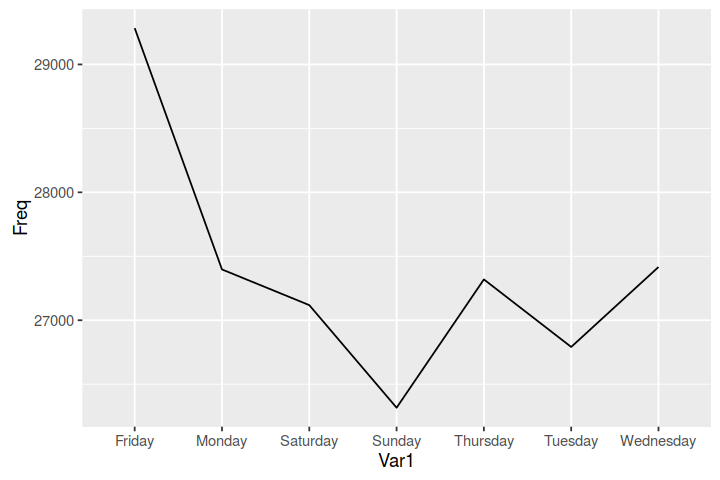

In [35]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
    geom_line(aes(group=1))

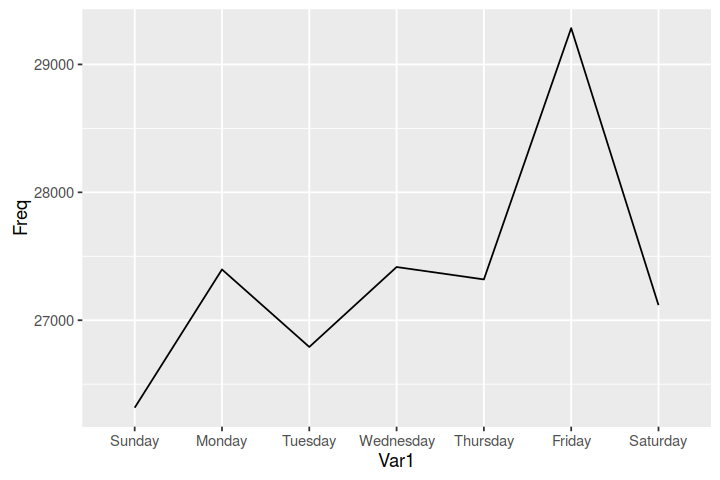

In [36]:
WeekdayCounts$Var1 = factor(WeekdayCounts$Var1, ordered=T,
                            levels=c('Sunday', 'Monday', 'Tuesday',
                                     'Wednesday', 'Thursday', 'Friday',
                                     'Saturday'))
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
    geom_line(aes(group=1))

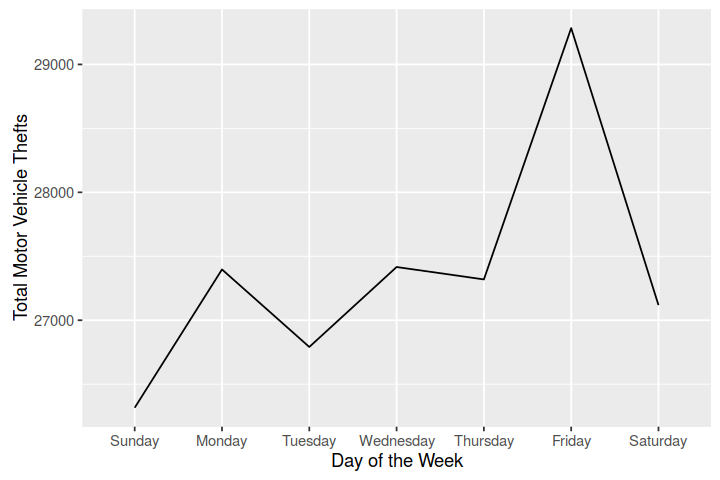

In [37]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
    geom_line(aes(group=1)) +
    xlab('Day of the Week') +
    ylab('Total Motor Vehicle Thefts')

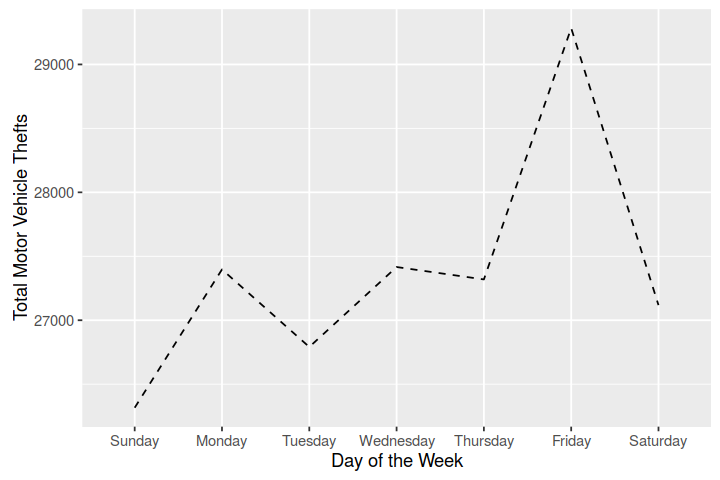

In [38]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
    geom_line(aes(group=1), linetype=2) +
    xlab('Day of the Week') +
    ylab('Total Motor Vehicle Thefts')

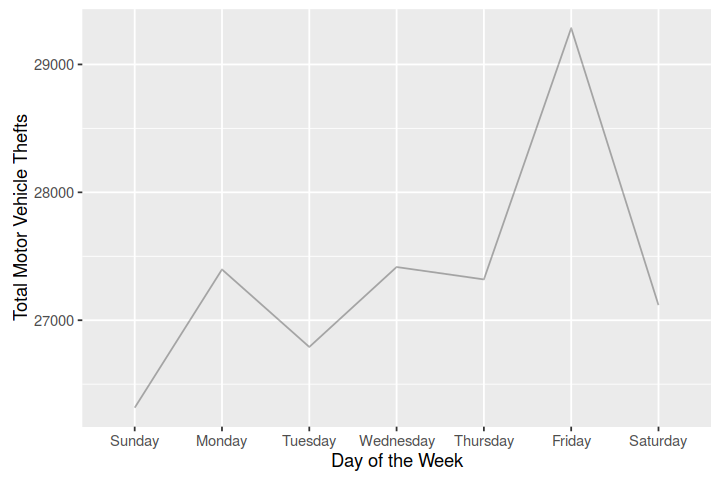

In [39]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
    geom_line(aes(group=1), alpha=0.3) +
    xlab('Day of the Week') +
    ylab('Total Motor Vehicle Thefts')

In [40]:
table(mvt$Weekday, mvt$Hour)

           
               0    1    2    3    4    5    6    7    8    9   10   11   12
  Friday    1873  932  743  560  473  602  839 1203 1268 1286  938  822 1207
  Monday    1900  825  712  527  415  542  772 1123 1323 1235  971  737 1129
  Saturday  2050 1267  985  836  652  508  541  650  858 1039  946  789 1204
  Sunday    2028 1236 1019  838  607  461  478  483  615  864  884  787 1192
  Thursday  1856  816  696  508  400  534  799 1135 1298 1301  932  731 1093
  Tuesday   1691  777  603  464  414  520  845 1118 1175 1174  948  786 1108
  Wednesday 1814  790  619  469  396  561  862 1140 1329 1237  947  763 1225
           
              13   14   15   16   17   18   19   20   21   22   23
  Friday     857  937 1140 1165 1318 1623 1652 1736 1881 2308 1921
  Monday     824  958 1059 1136 1252 1518 1503 1622 1815 2009 1490
  Saturday   767  963 1086 1055 1084 1348 1390 1570 1702 2078 1750
  Sunday     789  959 1037 1083 1160 1389 1342 1706 1696 2079 1584
  Thursday   752  831 104

In [41]:
DayHourCounts = as.data.frame(table(mvt$Weekday, mvt$Hour))
str(DayHourCounts)

'data.frame':	168 obs. of  3 variables:
 $ Var1: Factor w/ 7 levels "Friday","Monday",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ Var2: Factor w/ 24 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Freq: int  1873 1900 2050 2028 1856 1691 1814 932 825 1267 ...


In [42]:
DayHourCounts$Hour = as.numeric(as.character(DayHourCounts$Var2))

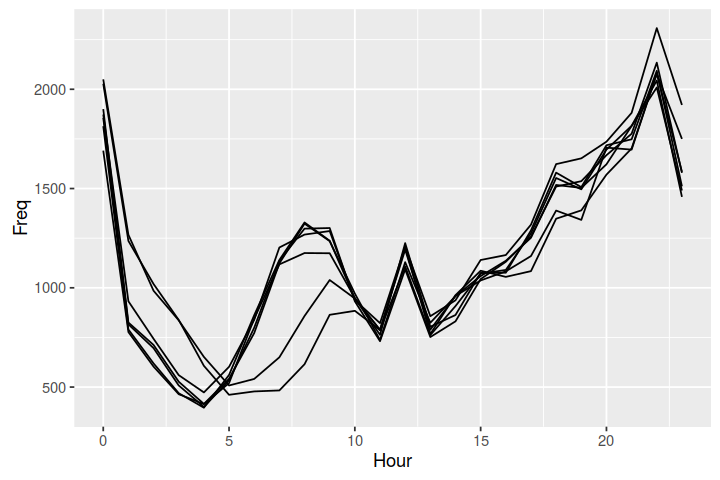

In [43]:
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) +
    geom_line(aes(group=Var1))

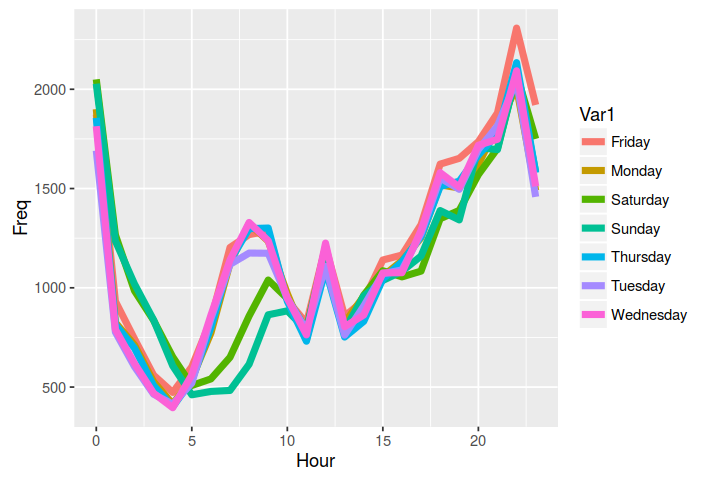

In [46]:
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) +
    geom_line(aes(group=Var1, color=Var1), size=2)

In [47]:
DayHourCounts$Var1 = factor(
    DayHourCounts$Var1,
    ordered=T,
    levels=c('Sunday', 'Monday', 'Tuesday',
             'Wednesday', 'Thursday', 'Friday',
             'Saturday'))

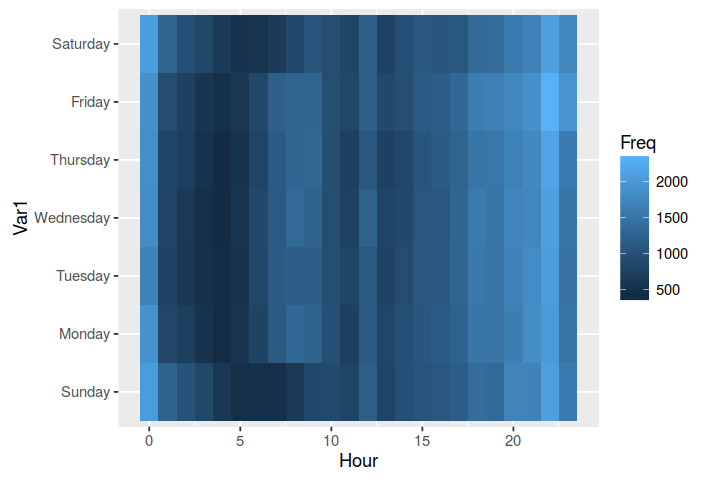

In [48]:
ggplot(DayHourCounts, aes(x=Hour, y=Var1)) +
    geom_tile(aes(fill=Freq))

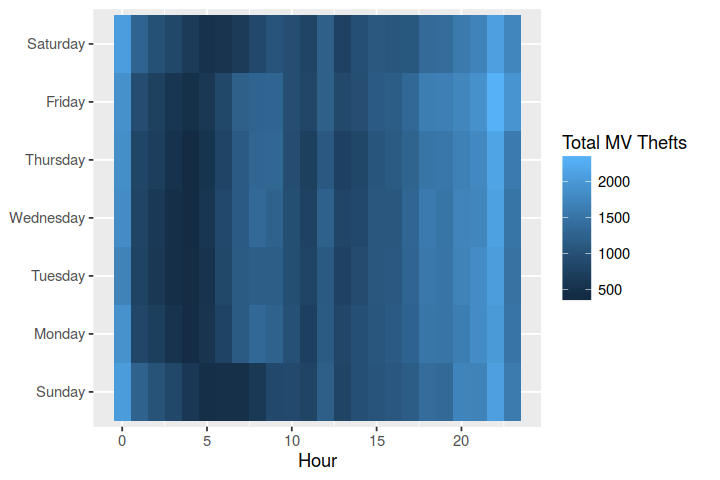

In [49]:
ggplot(DayHourCounts, aes(x=Hour, y=Var1)) +
    geom_tile(aes(fill=Freq)) +
    scale_fill_gradient(name='Total MV Thefts') +
    theme(axis.title.y=element_blank())

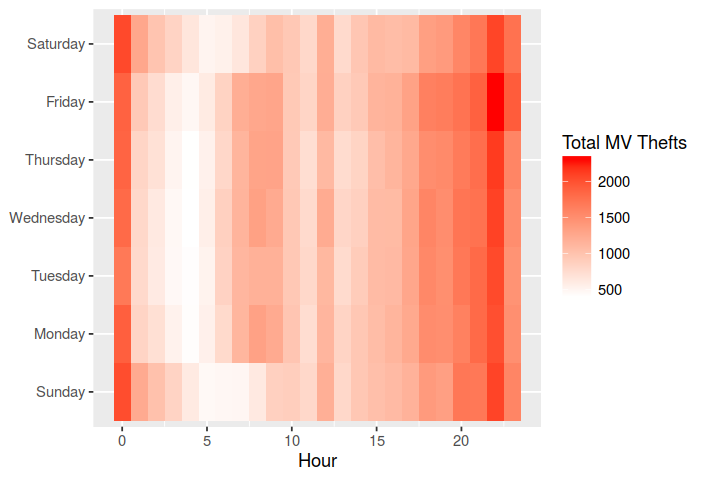

In [50]:
ggplot(DayHourCounts, aes(x=Hour, y=Var1)) +
    geom_tile(aes(fill=Freq)) +
    scale_fill_gradient(name='Total MV Thefts', low='white', high='red') +
    theme(axis.title.y=element_blank())

In [51]:
library(maps)
library(ggmap)


 # maps v3.1: updated 'world': all lakes moved to separate new #
 # 'lakes' database. Type '?world' or 'news(package="maps")'.  #



Attaching package: 'maps'

The following object is masked from 'package:plyr':

    ozone


Attaching package: 'ggmap'

The following object is masked from 'package:magrittr':

    inset



In [52]:
chicago = get_map(location='chicago', zoom=11)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false


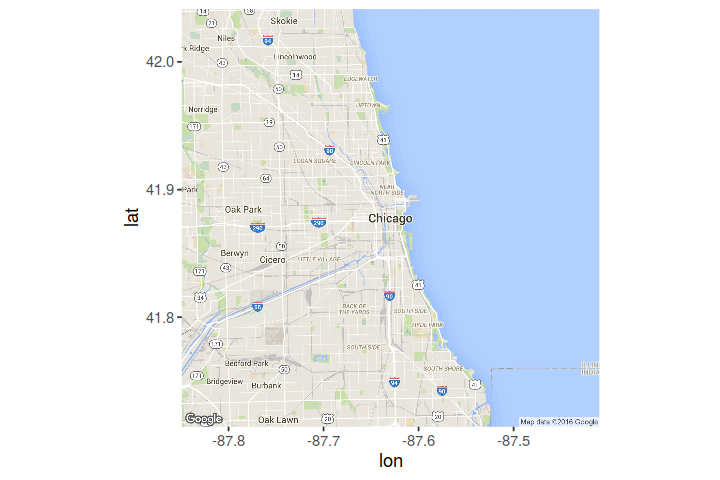

In [53]:
ggmap(chicago)

Warning message:
: Removed 7 rows containing missing values (geom_point).

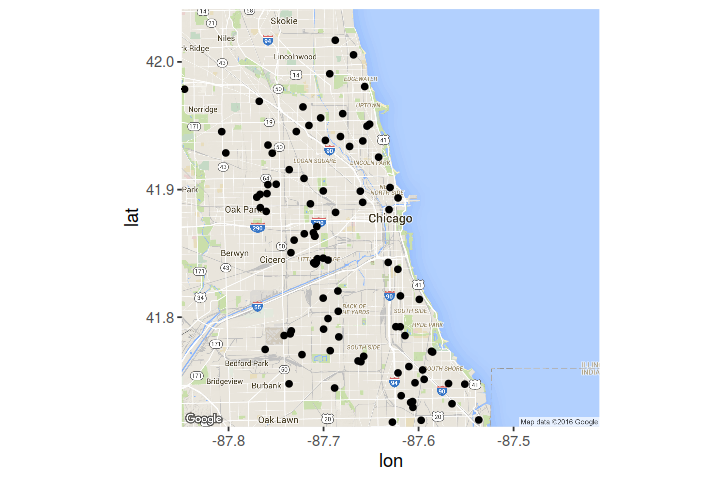

In [54]:
ggmap(chicago) + geom_point(data=mvt[1:100,],
                            aes(x=Longitude, y=Latitude))

In [55]:
LatLonCounts = as.data.frame(table(round(mvt$Longitude, 2),
                                   round(mvt$Latitude, 2)))

In [56]:
str(LatLonCounts)

'data.frame':	1638 obs. of  3 variables:
 $ Var1: Factor w/ 42 levels "-87.93","-87.92",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 39 levels "41.64","41.65",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  0 0 0 0 0 0 0 0 0 0 ...


In [57]:
LatLonCounts$Long = as.numeric(as.character(LatLonCounts$Var1))
LatLonCounts$Lat = as.numeric(as.character(LatLonCounts$Var2))

Warning message:
: Removed 615 rows containing missing values (geom_point).

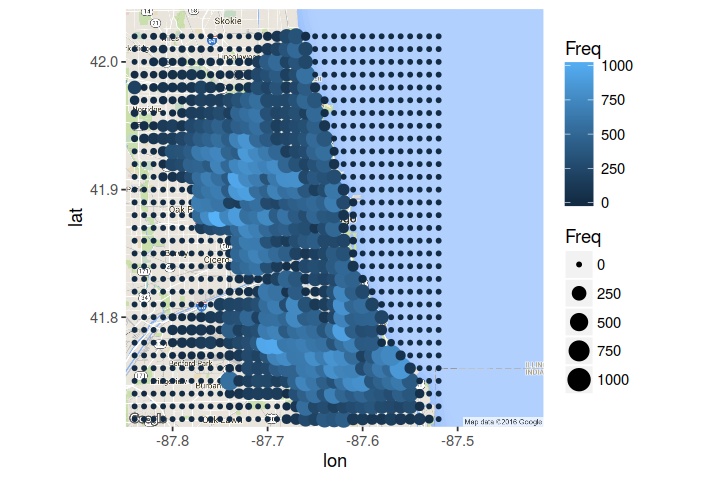

In [58]:
ggmap(chicago) + geom_point(data=LatLonCounts,
                            aes(x=Long, y=Lat, col=Freq, size=Freq))

Warning message:
: Removed 615 rows containing missing values (geom_point).

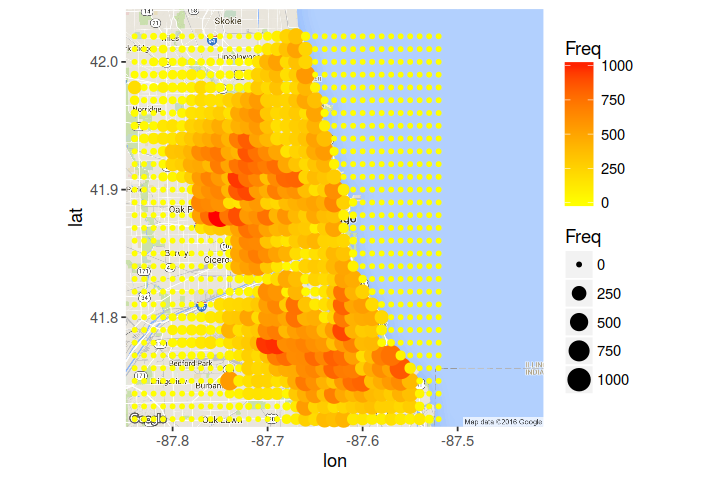

In [59]:
ggmap(chicago) + geom_point(data=LatLonCounts,
                            aes(x=Long, y=Lat, col=Freq, size=Freq)) +
    scale_color_gradient(low='yellow', high='red')

Warning message:
: Removed 615 rows containing missing values (geom_tile).

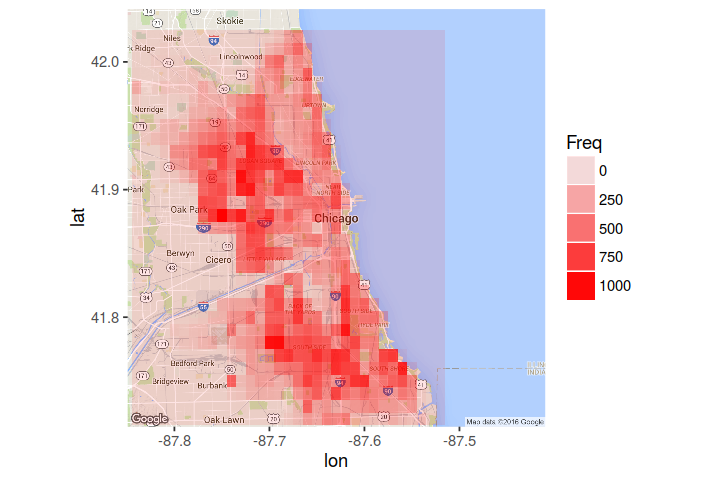

In [60]:
ggmap(chicago) +
    geom_tile(data=LatLonCounts,
              aes(x=Long, y=Lat, alpha=Freq), fill='red')

Warning message:
: Removed 119 rows containing missing values (geom_tile).

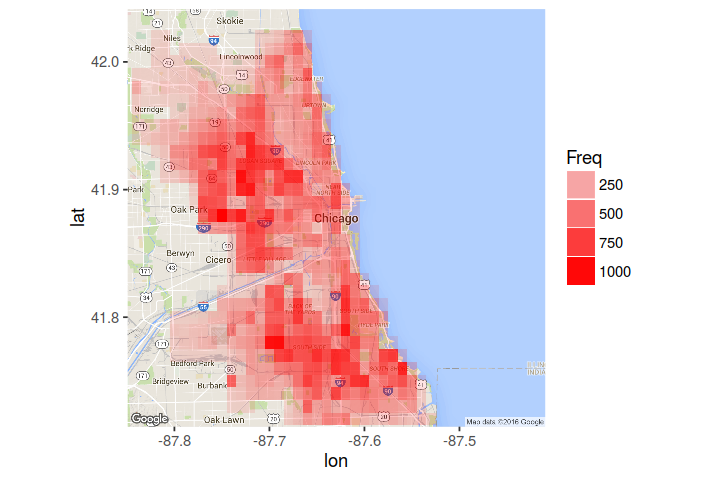

In [61]:
LatLonCounts2 = subset(LatLonCounts, Freq>0)
ggmap(chicago) +
    geom_tile(data=LatLonCounts2,
              aes(x=Long, y=Lat, alpha=Freq), fill='red')

In [63]:
nrow(subset(LatLonCounts, Freq==0))

[1] 952